In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [6]:
dataset = load_wine()

In [7]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
df = pd.DataFrame(dataset['data'],columns = dataset['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [10]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [12]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [13]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [14]:
# How many missing zeros are mising in each feature
feature_columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

alcohol ==> Missing zeros : 0
malic_acid ==> Missing zeros : 0
ash ==> Missing zeros : 0
alcalinity_of_ash ==> Missing zeros : 0
magnesium ==> Missing zeros : 0
total_phenols ==> Missing zeros : 0
flavanoids ==> Missing zeros : 0
nonflavanoid_phenols ==> Missing zeros : 0
proanthocyanins ==> Missing zeros : 0
color_intensity ==> Missing zeros : 0
hue ==> Missing zeros : 0


In [15]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[feature_columns] = fill_values.fit_transform(df[feature_columns])

In [17]:

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

alcohol ==> Missing zeros : 0
malic_acid ==> Missing zeros : 0
ash ==> Missing zeros : 0
alcalinity_of_ash ==> Missing zeros : 0
magnesium ==> Missing zeros : 0
total_phenols ==> Missing zeros : 0
flavanoids ==> Missing zeros : 0
nonflavanoid_phenols ==> Missing zeros : 0
proanthocyanins ==> Missing zeros : 0
color_intensity ==> Missing zeros : 0
hue ==> Missing zeros : 0


In [18]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[40  0  0]
 [ 0 50  0]
 [ 0  0 34]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  1.00  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00  1.00      1.00       1.00          1.00
support   40.00 50.00 34.00      1.00     124.00        124.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[17  2  0]
 [ 2 19  0]
 [ 1  0 13]]
ACCURACY SCORE:
0.9074
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.85  0.90  1.00      0.91       0.92          0.91
recall     0.89  0.90  0.93      0.91       0.91          0.91
f1-score   0.87  0.90  0.96      0.91       0.91          0.91
support   19.00 21.00 14.00      0.91      54.00         54.00


In [21]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[40  0  0]
 [ 0 50  0]
 [ 0  0 34]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  1.00  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00  1.00      1.00       1.00          1.00
support   40.00 50.00 34.00      1.00     124.00        124.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[19  0  0]
 [ 1 20  0]
 [ 0  0 14]]
ACCURACY SCORE:
0.9815
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.95  1.00  1.00      0.98       0.98          0.98
recall     1.00  0.95  1.00      0.98       0.98          0.98
f1-score   0.97  0.98  1.00      0.98       0.98          0.98
support   19.00 21.00 14.00      0.98      54.00         54.00


In [23]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[39  1  0]
 [ 1 49  0]
 [ 0  0 34]]
ACCURACY SCORE:
0.9839
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.97  0.98  1.00      0.98       0.98          0.98
recall     0.97  0.98  1.00      0.98       0.98          0.98
f1-score   0.97  0.98  1.00      0.98       0.98          0.98
support   40.00 50.00 34.00      0.98     124.00        124.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[18  1  0]
 [ 1 20  0]
 [ 0  1 13]]
ACCURACY SCORE:
0.9444
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.95  0.91  1.00      0.94       0.95          0.95
recall     0.95  0.95  0.93      0.94       0.94          0.94
f1-score   0.95  0.93  0.96      0.94       0.95          0.94
support   19.00 21.00 14.00      0.94      54.00         54.00


In [24]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[40  0  0]
 [ 0 50  0]
 [ 0  0 34]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  1.00  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00  1.00      1.00       1.00          1.00
support   40.00 50.00 34.00      1.00     124.00        124.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[16  3  0]
 [ 2 19  0]
 [ 1  0 13]]
ACCURACY SCORE:
0.8889
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.84  0.86  1.00      0.89       0.90          0.89
recall     0.84  0.90  0.93      0.89       0.89          0.89
f1-score   0.84  0.88  0.96      0.89       0.90          0.89
support   19.00 21.00 14.00      0.89      54.00         54.00


In [29]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

<Axes: >

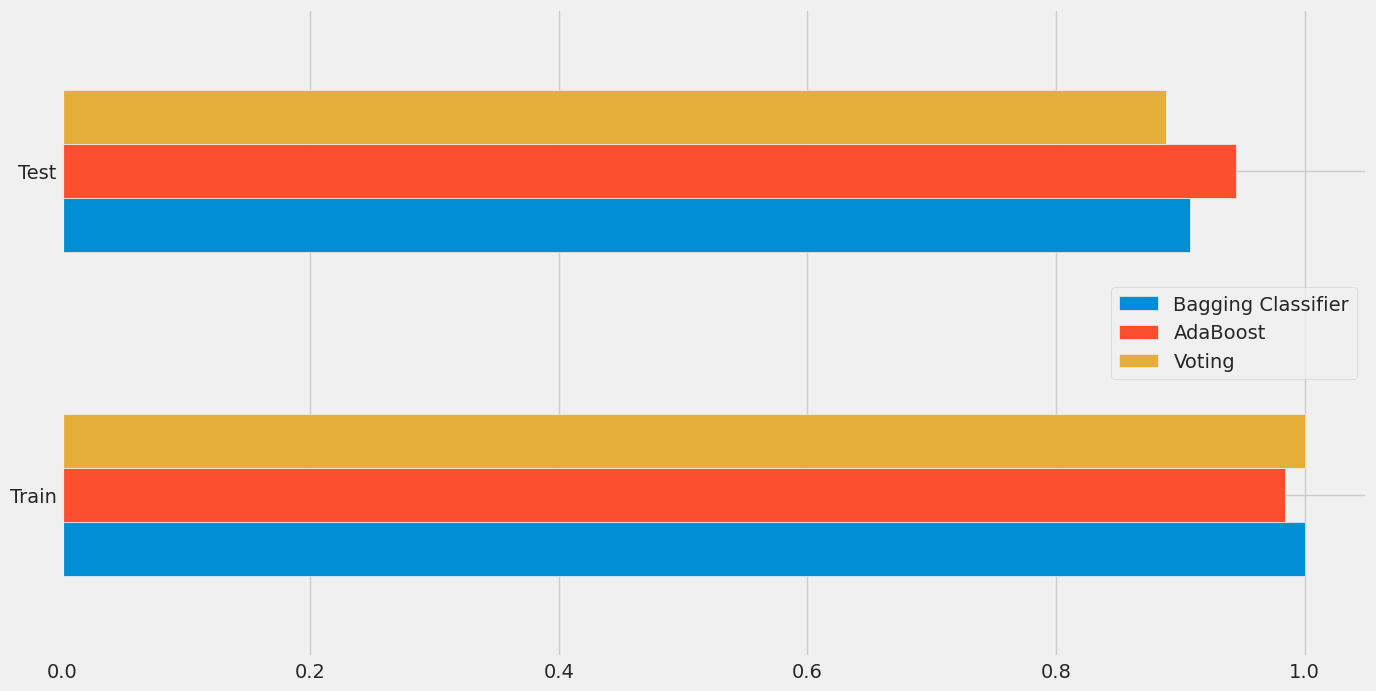

In [30]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))